### Exploratory Data Analysis (EDA) - Wine Quality 

#### Objective
This notebook presents an Exploratory Data Analysis (EDA) of a dataset consisting of physicochemical properties and quality (sensory) data for Portuguese "vinho verde" white and red wines samples.

The objective is to analyze the data to identify correlations between variables before applying a machine learning model to predict wine quality based on physicochemical characteristics.

http://www3.dsi.uminho.pt/pcortez/wine/


#### Input Variables - Physicochemical analysis 

1. **Fixed Acidity**: The concentration of non-volatile acids, primarily tartaric, malic, and citric acids, contributing to the wine's tartness and stability.

2. **Volatile Acidity**: The amount of acetic acid and other volatile acids present, which can affect the aroma and spoil the wine if too high.

3. **Citric Acid**: A minor acid in wine that can add freshness and enhance the fruity flavors.

4. **Residual Sugar**: The sugar remaining after fermentation, influencing sweetness and body.

5. **Chlorides**: The chloride ion concentration, which can affect the taste and stability of the wine.

6. **Free Sulfur Dioxide**: The portion of sulfur dioxide that is not bound to other compounds, acting as an antimicrobial and antioxidant.

7. **Total Sulfur Dioxide**: The total amount of sulfur dioxide, both free and bound, used as a preservative.

8. **Density**: The mass per unit volume of the wine, related to the alcohol and sugar content.

9. **pH**: The measure of the acidity or basicity of the wine, affecting taste, color, and microbial stability.

10. **Sulphates**: Compounds that can contribute to wine stability and preservation, also influencing mouthfeel.

11. **Alcohol**: The ethanol content resulting from fermentation, affecting the wine's body, war
12. **Type**: Categorical, Red or White Wine.
#### Output Variable - Sensory data
12. **Quality**: A sensory-based score ranging from 0 to 10, reflecting the overall perceived quality of the wine based on taste, aroma, balanoverall enjoyment.mth, and preservation.

#### Data Analysis

1. IMPORTING LIBRARIES

In [1]:
# Import all necesaries libraries
# !pip install pandas --user
# !pip install seaborn --user
# !pip install matplotlib --user
# !pip install missingno --user
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


2. DATA DESCRIPTION AND DATA CLEANING

In this block, exploratory data analysis will be carried out, data types, missing values, duplicates, measures of the central trend, and also the relationship between variables will be described.

In [2]:
# Reading data
df = pd.read_csv("WineQuality.csv")

In [3]:
# Showing first rows of the DataFrame
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
1,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
2,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
3,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
4,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine


In [4]:
# Let's look at the dimension of the data
print(f'Data contain {df.shape[0]} records and {df.shape[1]} columns.')

Data contain 32485 records and 14 columns.


In [5]:
# Let's see data types
df.dtypes

id                        int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Type                     object
dtype: object

Data contains 1 categorical column (type) and 13 numerical columns

2.1. Missing values

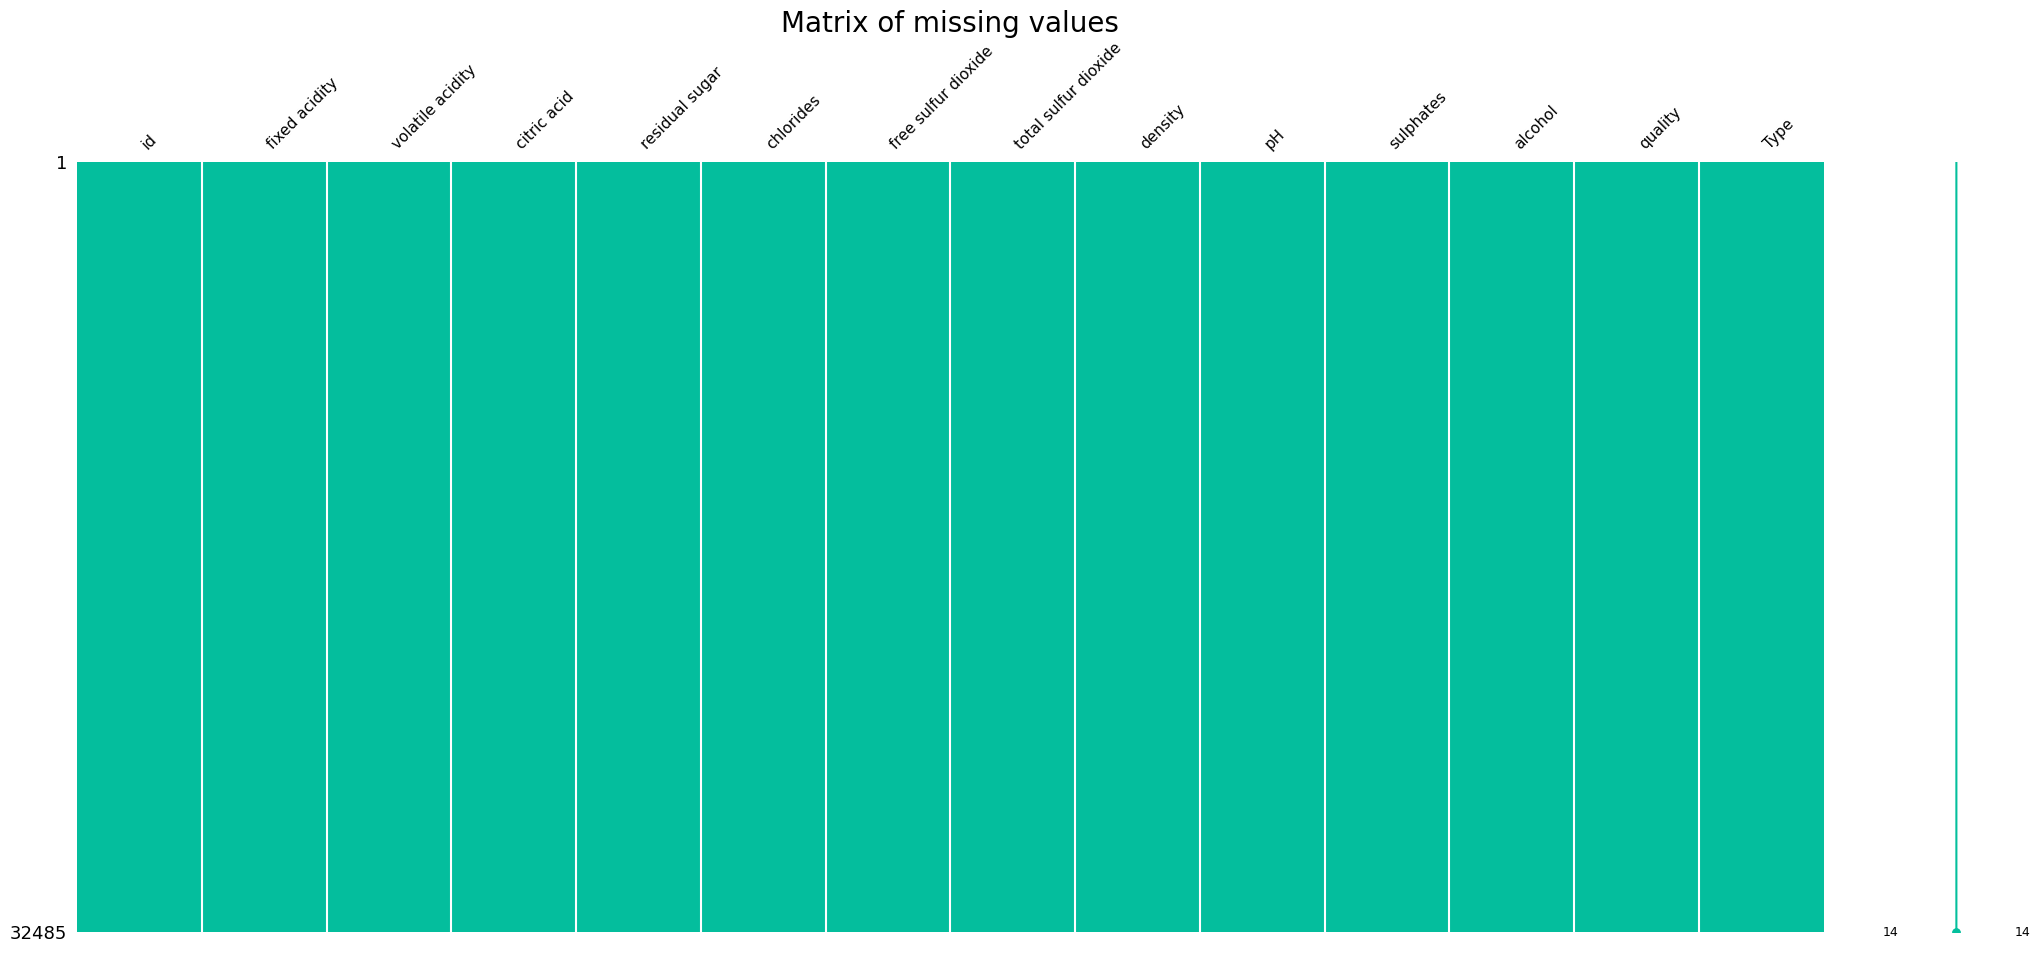

In [6]:
# Build a matrix of missing values
msno.matrix(df, fontsize=11, color=(0.0157, 0.749, 0.6157))  # Cambia el color aquí
plt.title('Matrix of missing values',fontsize=20)
plt.show()

There are no missing values on the DataSet

2.2. Duplicated data

In [7]:
# Let's see the duplicates rows
duplicates= df.duplicated()
num_duplicates = sum(duplicates)
print(f"Number of duplicated rows: {num_duplicates}")


Number of duplicated rows: 26036


In [8]:
#Let's remove duplicates
num_duplicates = df.shape[0] - df.drop_duplicates(keep='first').shape[0]
df = df.drop_duplicates()
print(f"Number of duplicate rows removed: {num_duplicates}")

Number of duplicate rows removed: 26036


In [9]:
# Let´s check how many wines are left in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6449 entries, 0 to 32482
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6449 non-null   int64  
 1   fixed acidity         6449 non-null   float64
 2   volatile acidity      6449 non-null   float64
 3   citric acid           6449 non-null   float64
 4   residual sugar        6449 non-null   float64
 5   chlorides             6449 non-null   float64
 6   free sulfur dioxide   6449 non-null   float64
 7   total sulfur dioxide  6449 non-null   float64
 8   density               6449 non-null   float64
 9   pH                    6449 non-null   float64
 10  sulphates             6449 non-null   float64
 11  alcohol               6449 non-null   float64
 12  quality               6449 non-null   int64  
 13  Type                  6449 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 755.7+ KB


In [10]:
# Let's delete id column for later analysis
del df["id"]

The data contains 6,449 different wines, each described by 12 physicochemical characteristics. 

Wines are presented in two categories: white and red.

2.3. Categorical Variables

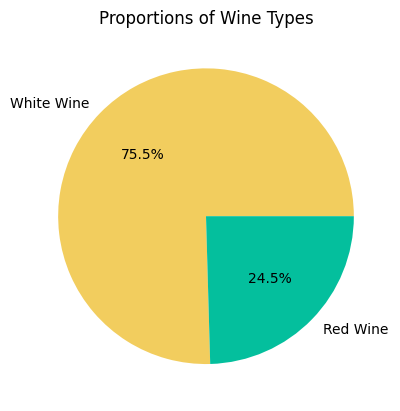

In [11]:
 # Describing categorical variables 
counts = df["Type"].value_counts()

colors = ['#F2CD5E','#04BF9D']
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Proportions of Wine Types')
plt.show()

Most samples on the dataset are from White wine

2.4. Numerical Variables

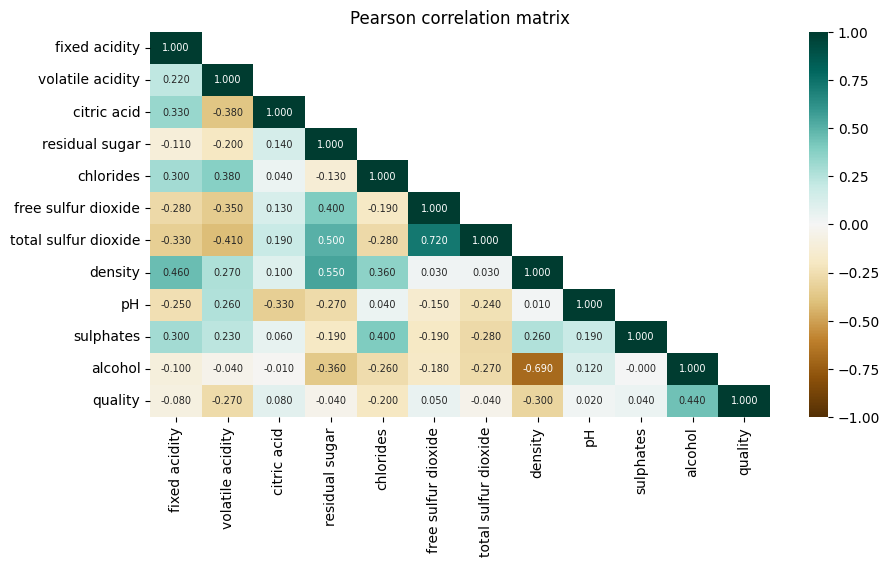

In [12]:
# Search for correalations between variables
# Search for correalations between variables
df_continuous_vars = df.select_dtypes(include=[np.number])

# Correlacón de Pearson
corr = df_continuous_vars.corr().round(2)

f, ax = plt.subplots(figsize=(10, 5))
# Crea una máscara para ocultar los valores superiores a la diagonal
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)
# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt=".3f", annot_kws={"size": 7}, cmap='BrBG', mask=mask)

# Modify the legend size and rotation for the bottom legends



# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.title ("Pearson correlation matrix")
plt.show()



There is a low correlation between most of the variables, except for the following pairs:
- Free sulfur dioxide and total sulfur dioxide
- Alcohol and density
- density and residual sugar
  
This is expected, as the dataframe includes both white and red wines, which differ significantly in their composition as it can be seen next.

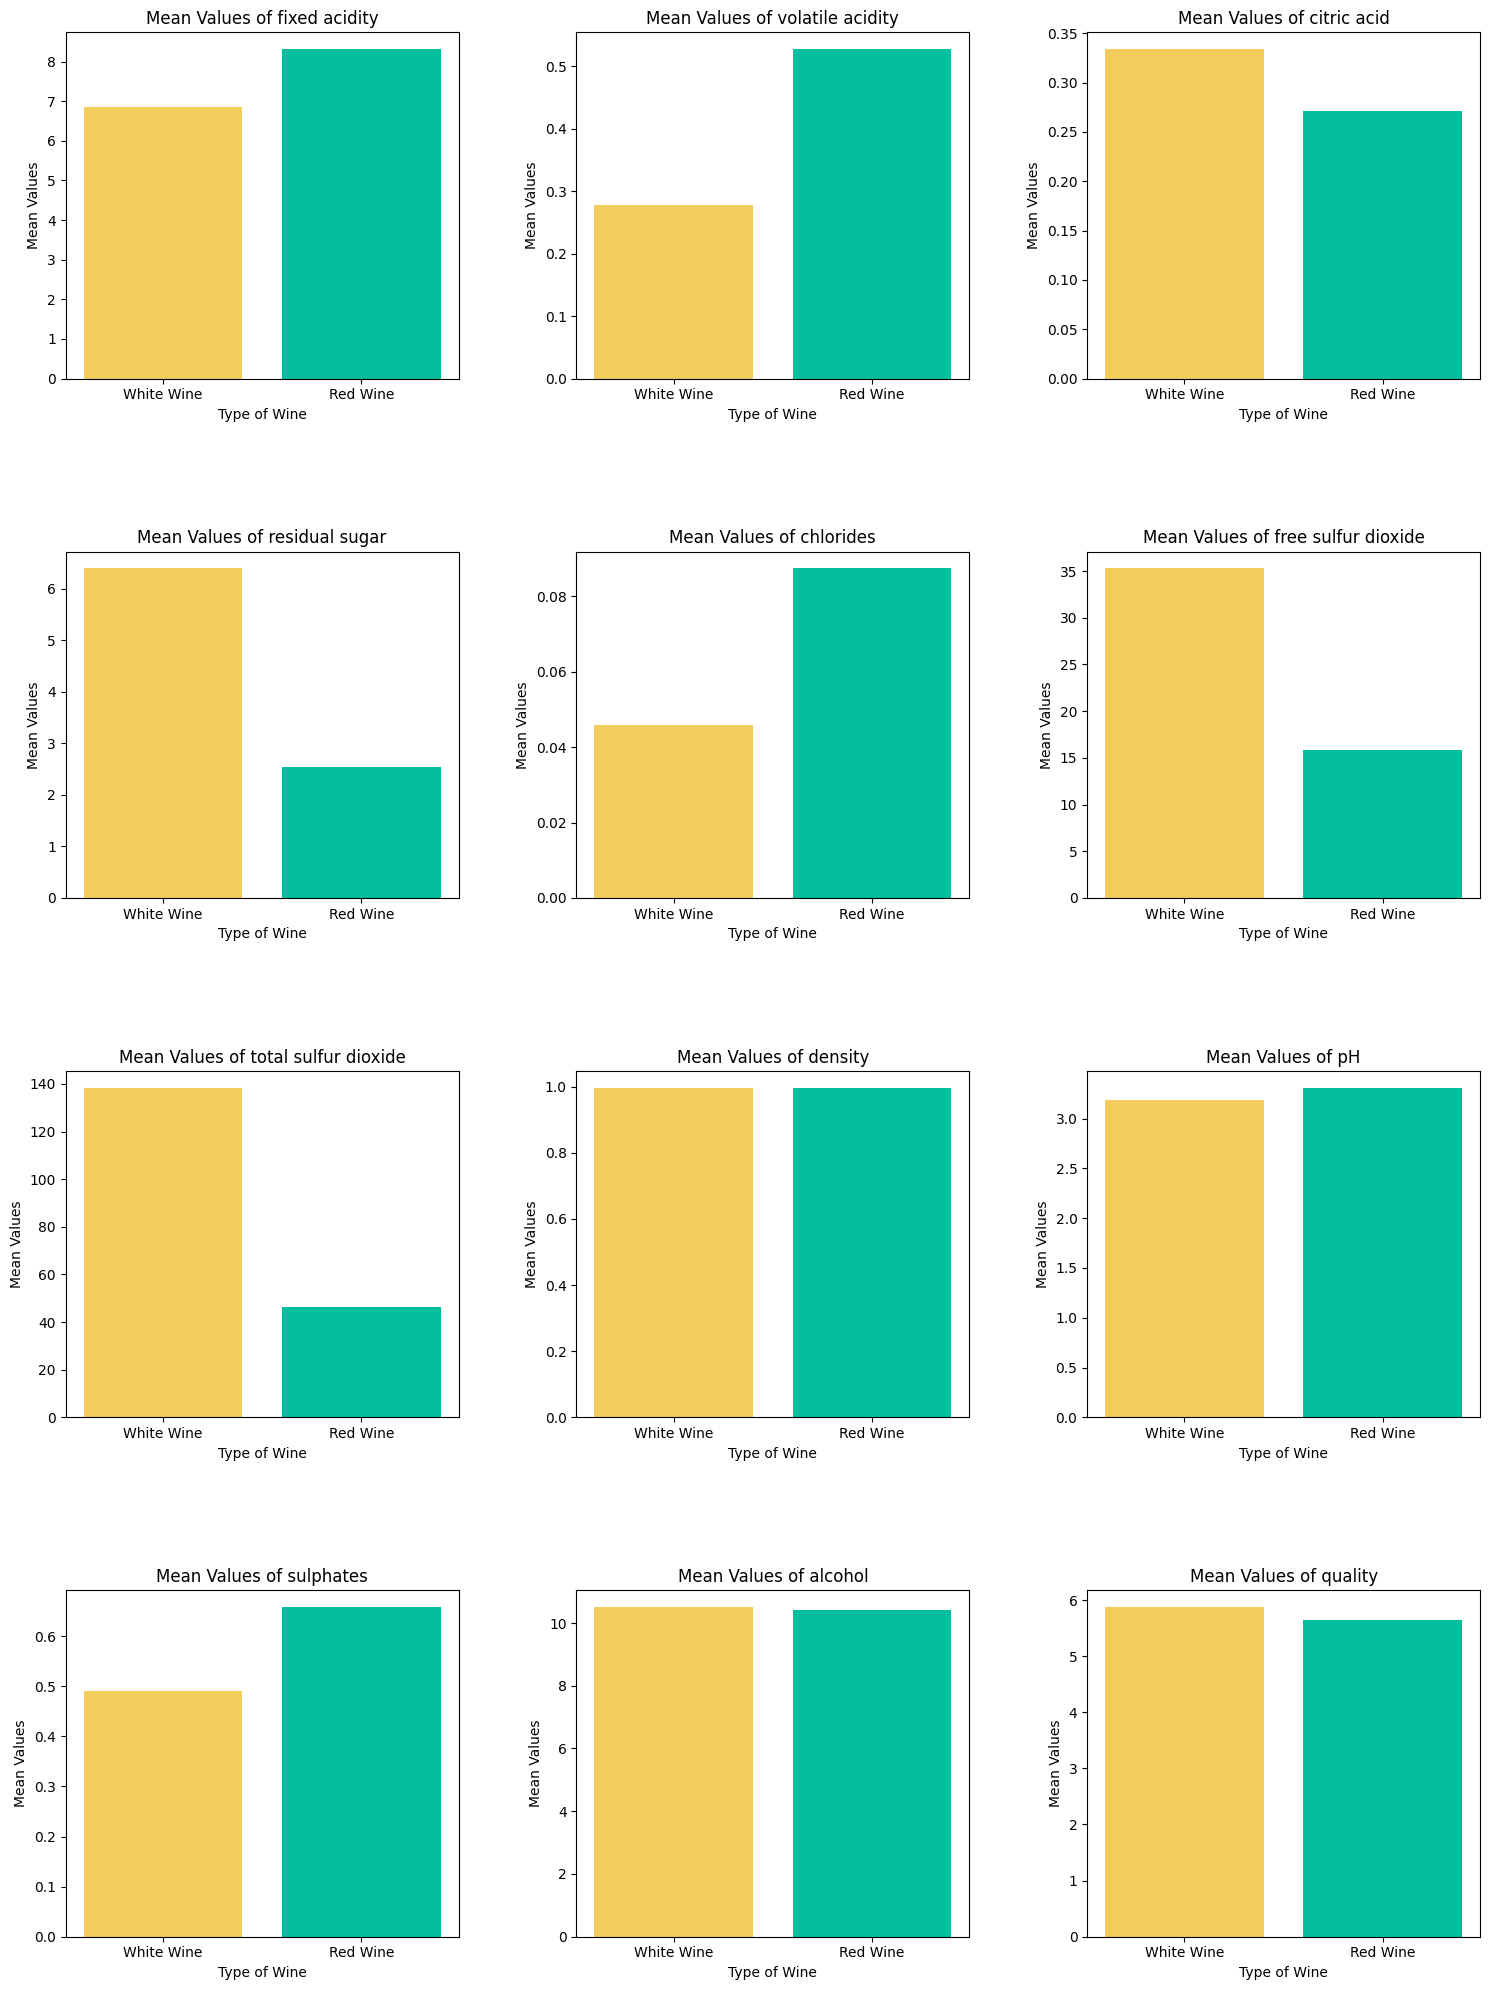

In [13]:
# Let's explore the differences in mean variable values between the types of wines

# Calculate the mean of each characteristic for each type of wine
promedios_blancos = df[df['Type'] == 'White Wine'].select_dtypes(include=[int, float]).mean()
promedios_tintos = df[df['Type'] == 'Red Wine'].select_dtypes(include=[int, float]).mean()


# Define the colors for each type of wine
colors = ['#F2CD5E','#04BF9D']

# Create a figure with a 3-column grid
fig, axs = plt.subplots(nrows=(len(promedios_blancos) + 2) // 3, ncols=3, figsize=(15, 20))

# Create a chart for each value in the series
for i, (name, val) in enumerate(promedios_blancos.items()):
    row = i // 3
    col_idx = i % 3
    axs[row, col_idx].bar(['White Wine', 'Red Wine'], [val, promedios_tintos[name]], color=[colors[0], colors[1]])
    axs[row, col_idx].set_xlabel('Type of Wine')
    axs[row, col_idx].set_ylabel('Mean Values')
    axs[row, col_idx].set_title(f'Mean Values of {name}')

# Hide the empty axes
for ax in axs.flat:
    if not ax.has_data():
        ax.axis('off')

# Display the grid of charts
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

There are substantial differences in the averages of these physicochemical characteristics between red and white wines:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorids
- free sulphure dioxid
- sulphure dioxid
- sulphates

Let's explore correlations for white wines on one side and red wines on the other.


2.4.1. White wines correlations

In [14]:
# DataSubset with White Wines
df_white = df[df["Type"] == "White Wine"]

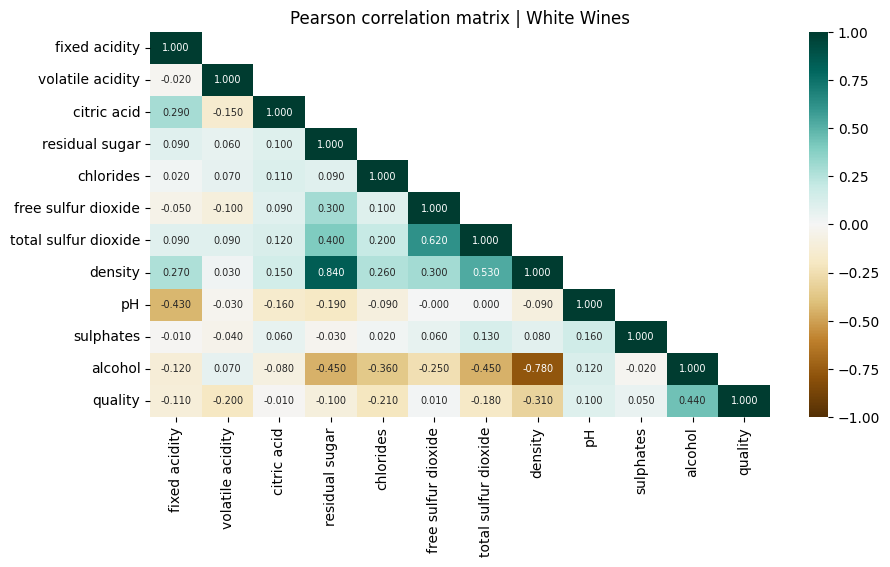

In [17]:
# Search for correalations between variables
df_white_continuous_vars = df_white.select_dtypes(include=[np.number])

# Correlacón de Pearson
corr_white = df_white_continuous_vars.corr().round(2)

fig,ax = plt.subplots(figsize=(10, 5))
# Crea una máscara para ocultar los valores superiores a la diagonal
mask = np.triu(np.ones_like(corr_white, dtype=bool))
np.fill_diagonal(mask, False)
# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(corr_white, vmin=-1, vmax=1, annot=True, fmt=".3f", annot_kws={"size": 7}, cmap='BrBG', mask=mask)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.title ("Pearson correlation matrix | White Wines")
plt.show()

For White Wines, there is a positive correlation between this pair of variables:
- density and residual sugar
- total sulfur dioxide and free sulfur dioxide
- density adn total sulfur dioxide

There is a negative correlation between:
- alcohol and density

2.4.2. Red Wines correlations

In [18]:
# DataSubset with Red Wines
df_red = df[df["Type"] == "Red Wine"]

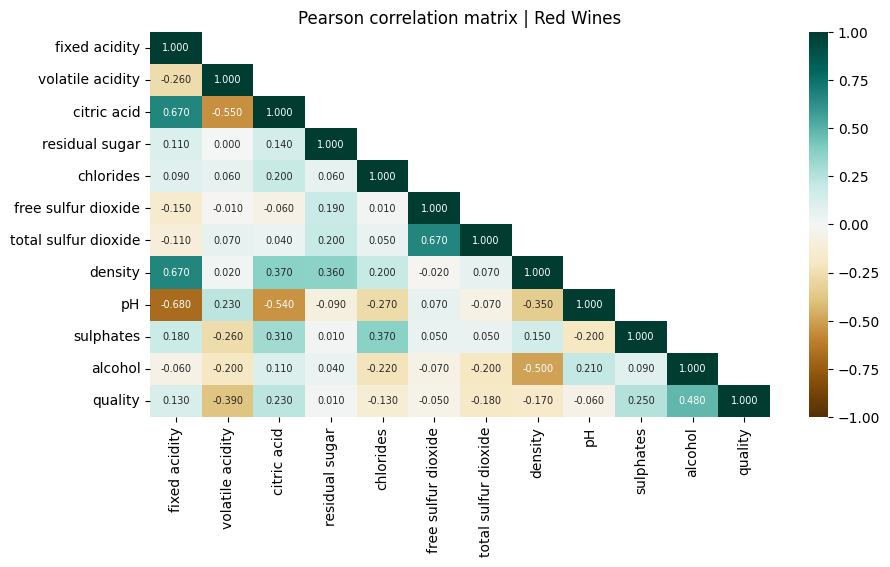

In [24]:
# Search for correalations between variables
df_red_continuous_vars = df_red.select_dtypes(include=[np.number])

# Correlacón de Pearson
corr_red = df_red_continuous_vars.corr().round(2)

fig,ax = plt.subplots(figsize=(10, 5))
# Crea una máscara para ocultar los valores superiores a la diagonal
mask = np.triu(np.ones_like(corr_white, dtype=bool))
np.fill_diagonal(mask, False)
# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(corr_red, vmin=-1, vmax=1, annot=True, fmt=".3f", annot_kws={"size": 7}, cmap='BrBG', mask=mask)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.title ("Pearson correlation matrix | Red Wines")
plt.show()

For Red Wines, there is a positive correlation between this pair of variables:
- citric acid and fixed acidity
- density and fixed acidity
- total sulfur dioxide and free sulfur dioxide

There is a negative correlation between:
- citric acid and volatile acidity
- ph and citric acid
- ph and fixed acidity

Output variable | Quality

In [111]:
# Let´s describe variable Quality
quality = df['quality']
quality.describe()

count    6449.000000
mean        5.817336
std         0.872699
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

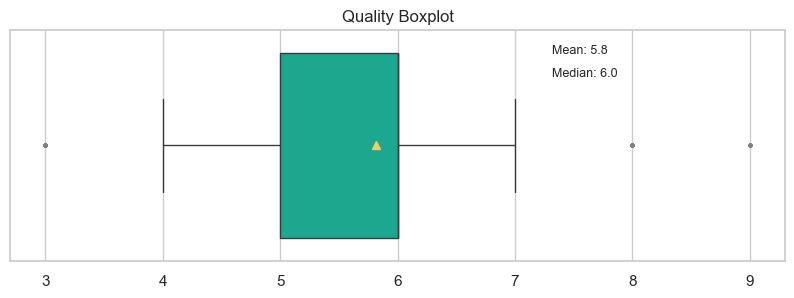

In [81]:
#Let´s create a Boxplot for Quality

plt.figure(figsize=(10, 3))
sns.boxplot( data = df, x = "quality", showmeans=True, color="#04BF9D", 
            meanprops={"markerfacecolor": "#F2CD5E", "markeredgecolor": "#F2CD5E"},
            flierprops={"markersize": 2, "markerfacecolor": "gray", "markeredgecolor": "gray"})
mean_val = df['quality'].mean()
median_val = df['quality'].median()

plt.annotate(f'Mean: {mean_val:.1f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=9)
plt.annotate(f'Median: {median_val:.1f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=9)

plt.title("Quality Boxplot")
plt.xlabel("")

# Eliminar líneas verticales
ax = plt.gca()
plt.show()


- The majority of wine quality scores are concentrated between 5 and 6, as indicated by the interquartile range (IQR).
- The mean wine quality score is 5.8, slightly below the median, suggesting a slight negative skew to the left in the distribution.
- There are some outliers with quality scores as low as 3 and as high as 9, indicating exceptional cases in wine quality.


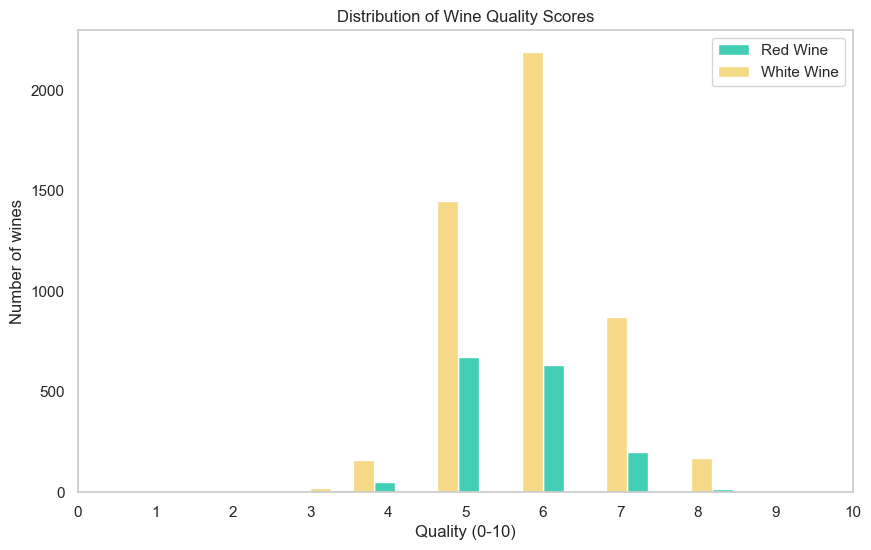

In [101]:
# Crear un histograma de la distribución de puntajes de calidad
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="quality", hue="Type", multiple="dodge", bins=11, palette=['#F2CD5E','#04BF9D'])
plt.xlabel('Quality (0-10)')
plt.ylabel('Number of wines')
plt.title('Distribution of Wine Quality Scores')
plt.xticks(range(11))
plt.legend(labels=["Red Wine", "White Wine"])
plt.grid(False)
plt.show()

The distribution of the quality variable appears to be normal and similar for both types of wines. 

2. FINAL CONCLUSIONS

Hacer análisis por tipo de vino para ver coorelaciones
Analizar variable de salida
conclusiones finales